In [7]:
import pandas as pd

# Load the Excel file

df = pd.read_excel(r'D:\Academics\Sem 5\ML_Notes\Copy of finalized ml(1).xlsx')

# Display the first few rows to understand the column names
print(df.head())


                        Date Time Session    HomeTeamName  AwayTeamName  \
0   6 July 1960 (1960-07-06)         Late          France    Yugoslavia   
1   6 July 1960 (1960-07-06)         Late  Czechoslovakia  Soviet Union   
2   9 July 1960 (1960-07-09)         Late  Czechoslovakia        France   
3  10 July 1960 (1960-07-10)         Late    Soviet Union    Yugoslavia   
4  17 June 1964 (1964-06-17)         Late           Spain       Hungary   

   HomeTeamGoals  AwayTeamGoals                 Stage       City  Attendance  \
0              4              5           Semi-finals      Paris     26370.0   
1              0              3           Semi-finals  Marseille     25184.0   
2              2              0  Third place play-off  Marseille      9438.0   
3              2              1                 Final      Paris     17966.0   
4              2              1           Semi-finals     Madrid     34713.0   

     Year  HomeTeam Form  AwayTeam Form  HomeTeam Keyplayers  \
0  1

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

# Define features and target
df['Result'] = df.apply(lambda row: 'Win' if row['HomeTeamGoals'] > row['AwayTeamGoals'] 
                        else ('Lose' if row['HomeTeamGoals'] < row['AwayTeamGoals'] else 'Draw'), axis=1)

# Features: Home and Away Goals
features = df[['HomeTeamGoals', 'AwayTeamGoals']]
target = df['Result']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Evaluate performance
def evaluate_performance(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=['Win', 'Lose', 'Draw'])
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, precision, recall, f1

# Training metrics
cm_train, precision_train, recall_train, f1_train = evaluate_performance(y_train, y_train_pred)
print("Training Performance:")
print("Confusion Matrix:\n", cm_train)
print(f"Precision: {precision_train}, Recall: {recall_train}, F1 Score: {f1_train}")

# Test metrics
cm_test, precision_test, recall_test, f1_test = evaluate_performance(y_test, y_test_pred)
print("\nTest Performance:")
print("Confusion Matrix:\n", cm_test)
print(f"Precision: {precision_test}, Recall: {recall_test}, F1 Score: {f1_test}")


Training Performance:
Confusion Matrix:
 [[122   0   0]
 [  0 105   1]
 [  0   0  82]]
Precision: 0.9968130586863584, Recall: 0.9967741935483871, F1 Score: 0.996776324628335

Test Performance:
Confusion Matrix:
 [[27  0  0]
 [ 0 31  0]
 [ 0  0 20]]
Precision: 1.0, Recall: 1.0, F1 Score: 1.0


In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df = pd.read_excel(r'D:\Academics\Sem 5\ML_Notes\Copy of finalized ml(1).xlsx')
df_clean = df.dropna(subset=['HomeTeamGoals', 'AwayTeamGoals', 'Attendance'])
# Features and target for regression
features = df_clean[['HomeTeamGoals', 'AwayTeamGoals']]
target = df_clean['Attendance']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Evaluate regression performance
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Training metrics
mse_train, rmse_train, mape_train, r2_train = evaluate_regression(y_train, y_train_pred)
print("\nTraining Regression Performance:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")

# Test metrics
mse_test, rmse_test, mape_test, r2_test = evaluate_regression(y_test, y_test_pred)
print("\nTest Regression Performance:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R2: {r2_test}")



Training Regression Performance:
MSE: 295808257.44973034, RMSE: 17199.077226692436, MAPE: 0.6441036608736843, R2: 0.009771566712145408

Test Regression Performance:
MSE: 266887347.16440865, RMSE: 16336.687153900226, MAPE: 0.5841833401342651, R2: -0.04345006415325581


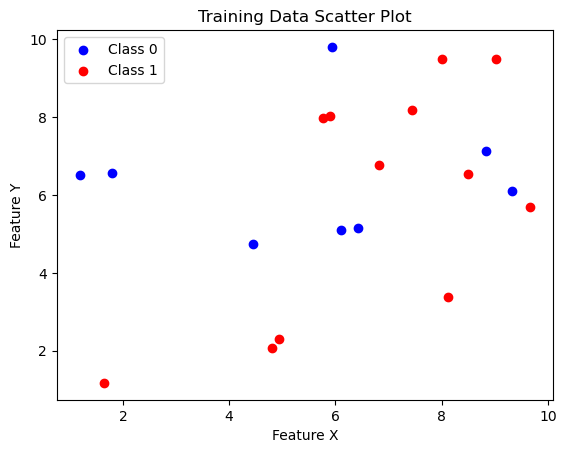

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data points
np.random.seed(0)
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)
classes = np.random.choice([0, 1], size=20)

# Scatter plot
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.title('Training Data Scatter Plot')
plt.show()


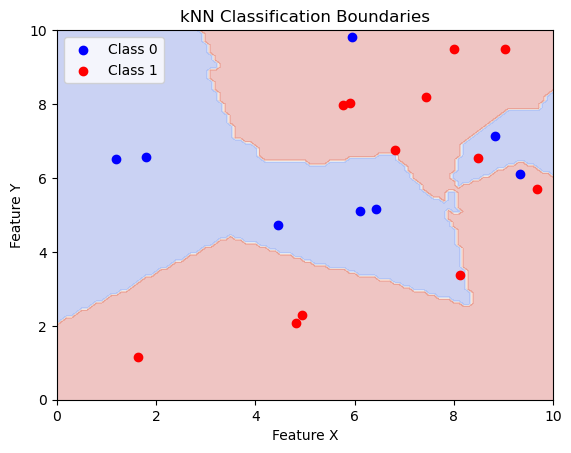

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Generate test data
test_X, test_Y = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data = np.c_[test_X.ravel(), test_Y.ravel()]

# Train kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(np.c_[X, Y], classes)

# Predict test data
predicted_classes = knn.predict(test_data)
predicted_classes = predicted_classes.reshape(test_X.shape)

# Plot
plt.contourf(test_X, test_Y, predicted_classes, alpha=0.3, cmap='coolwarm')
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.title('kNN Classification Boundaries')
plt.show()


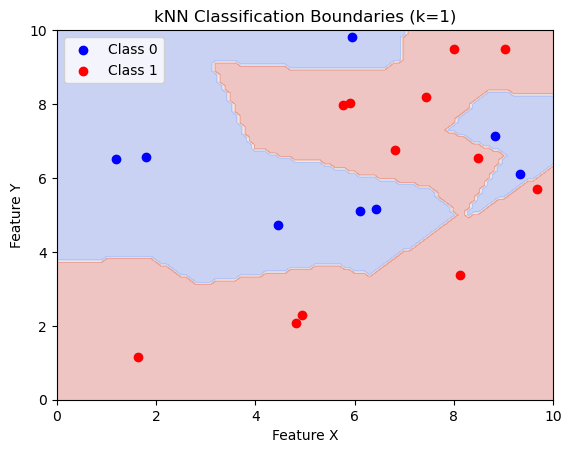

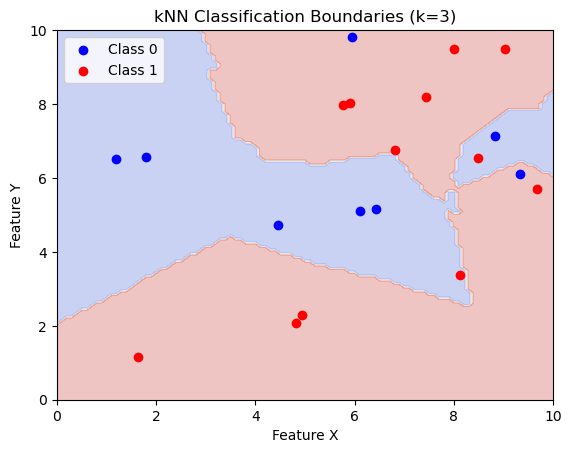

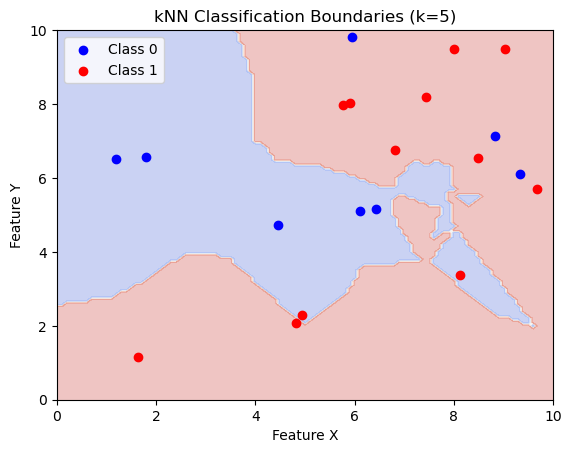

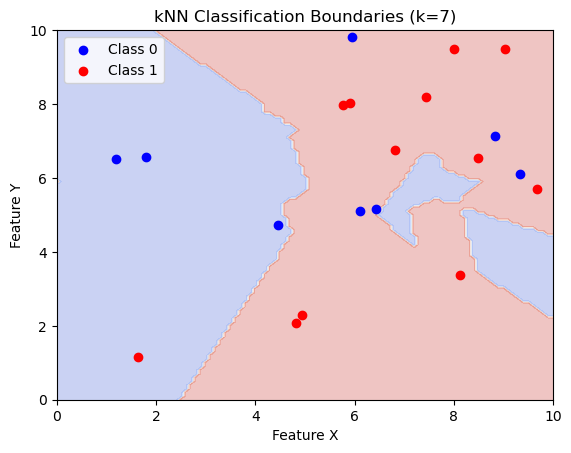

In [21]:
def plot_knn_with_different_k(X, Y, classes, test_data, test_X, test_Y, k_values):
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(np.c_[X, Y], classes)
        predicted_classes = knn.predict(test_data).reshape(test_X.shape)
        
        plt.figure()
        plt.contourf(test_X, test_Y, predicted_classes, alpha=0.3, cmap='coolwarm')
        plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0')
        plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1')
        plt.xlabel('Feature X')
        plt.ylabel('Feature Y')
        plt.legend()
        plt.title(f'kNN Classification Boundaries (k={k})')
        plt.show()

# Example usage
plot_knn_with_different_k(X, Y, classes, test_data, test_X, test_Y, [1, 3, 5, 7])


In [25]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Load the Excel file
df = pd.read_excel(r'D:\Academics\Sem 5\ML_Notes\Copy of finalized ml(1).xlsx')  # Replace with your actual file path

df['HomeTeamWin'] = (df['HomeTeamGoals'] > df['AwayTeamGoals']).astype(int)
# Define features (X) and target (Y)
X = df[['HomeTeamGoals', 'AwayTeamGoals']].values  # Features: Home and Away team goals
Y = df['HomeTeamWin'].values  # Target: Home team win (1 for win, 0 for not win)

# Define parameter grid for GridSearch
param_grid = {'n_neighbors': np.arange(1, 20)}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X, Y)

# Best parameters
best_k = grid_search.best_params_['n_neighbors']
print(f'Best k value: {best_k}')


Best k value: 1
